In [2]:
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt
import random


2.0.0


In [27]:
#生成数据集：
#训练样本数为1000，特征数为2，线性回归模型真实权重：w = [2,-3.4]T, 随机噪声服从均值为0、标准差为0.01的正态分布
nums_input = 2
nums_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = tf.random.normal((nums_examples,nums_input),stddev=1)
labels = true_w[0]*features[:,0] + true_w[1]*features[:,1] + true_b
labels+=tf.random.normal((lables.shape),stddev=0.01)
print(features[0],lables[0])


tf.Tensor([-1.6944164 -1.2778903], shape=(2,), dtype=float32) tf.Tensor(8.193232, shape=(), dtype=float32)


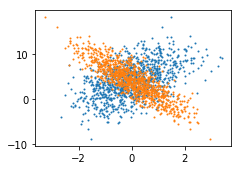

In [28]:
#画散点图
def set_figsize(figsize = (3.5,2.5)):
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
#feature[:,0]与label的关系，负相关，散点图
plt.scatter(features[:,0],labels,1)
#feature[:,1]与label的关系，负相关，散点图
plt.scatter(features[:,1],labels,1)

In [37]:
#读取数据，
#在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。
#这里我们定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。
def data_iter(batch_size,features,labels):
    nums_examples = len(features)
    indices = list(range(nums_examples))
    random.shuffle(indices)
    for i in range(0,nums_examples,batch_size):
        #切片，j是indices索引为i到min(i+批量大小,总长度)
        j = indices[i:min(i+batch_size,nums_examples)]
        # 截取，从features的0维，按照j切片取出数据，同理从labels中取
        yield tf.gather(features,axis=0,indices=j),tf.gather(labels,axis=0,indices=j)

In [38]:
#读取第一个小样本并打印
batch_size=10

for X, y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tf.Tensor(
[[-0.91470844  0.64516723]
 [ 0.46634182 -0.5449947 ]
 [-0.42063826  2.1323986 ]
 [ 2.3638747  -0.04834694]
 [-1.5820965  -1.7652578 ]
 [-1.3649925   0.9397537 ]
 [ 1.1781753   1.5663589 ]
 [ 0.5214035  -0.1855692 ]
 [ 0.02608646  0.29705086]
 [-1.6567614   1.6010444 ]], shape=(10, 2), dtype=float32) tf.Tensor(
[ 0.1816675  6.980261  -3.9007304  9.086262   7.0277104 -1.7237445
  1.2272844  5.8796844  3.241263  -4.564989 ], shape=(10,), dtype=float32)


In [41]:
#初始化模型参数
w = tf.Variable(tf.random.normal((nums_input,1),stddev=0.01))
b = tf.Variable(tf.zeros((1,)))
print(w,b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.00518122],
       [ 0.00836205]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [53]:
#定义模型
def linreg(X,w,b):
    return tf.matmul(X,w)+b

In [88]:
#定义损失函数
def squared_loss(y_hat,y):
    return (y_hat - tf.reshape(y,y_hat.shape)) **2 /2


In [104]:
#定义优化算法
#sgd函数实现了小批量随机梯度下降算法。
#它通过不断迭代模型参数来优化损失函数。
#这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。
#lr = learning rate 学习率
def sgd(params,lr,batch_size,grads):
    for i,param in enumerate(params):
        param.assign_sub(lr*grads[i] / batch_size)


In [107]:
#训练模型
lr = 0.03
nums_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(nums_epochs):
    for X,y in data_iter(batch_size,features,labels):
        with tf.GradientTape() as t:
            t.watch([w,b])
            l = tf.reduce_sum(loss(net(X,w,b),y))
        grads = t.gradient(l,[w,b])
        sgd([w,b],lr,batch_size,grads)
    train_l = loss(net(features,w,b),labels)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(train_l)))
    print(true_w,w)
    print(true_b,b)

epoch 1, loss 0.000046
[2, -3.4] <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.0005174],
       [-3.4004037]], dtype=float32)>
4.2 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199854], dtype=float32)>
epoch 2, loss 0.000046
[2, -3.4] <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.000602],
       [-3.400253]], dtype=float32)>
4.2 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.2001247], dtype=float32)>
epoch 3, loss 0.000046
[2, -3.4] <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 2.0004277],
       [-3.4003558]], dtype=float32)>
4.2 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.200047], dtype=float32)>


[2, -3.4] <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 1.9999974],
       [-3.3994236]], dtype=float32)>
4.2 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199487], dtype=float32)>
